# Homework 5

February 3, 2021

In [1]:
library(car)
library(ez)
library(tidyr)
library(nlme)
library(lme4)
library(lmerTest)
library(lattice)
library(dplyr)

Loading required package: carData
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘packag

#### 1.  Holly Taylor had subjects from each class at Tufts (first-year, sophomores, etc.  1-4) place 8 landmarks on a campus map.  See if class mattered.   Data in "holly_map_data.csv", please use DB as dependent variable.

In [3]:
#load data
map = read.csv('./data_files//holly_map_data.csv')
head(map,20)

pnum,year,landmark,DE,DB
1,1,Brown & Brew,0.13135797,-0.014486968
1,1,Campus Center,0.14815836,0.073903002
1,1,Carmichael Hall,0.11751105,-0.116084461
1,1,Dewick,0.11108875,-0.004069284
1,1,Dowling Hall,0.15446321,0.115854174
1,1,Goddard Chapel,0.15182844,0.081363246
1,1,Olin Center,0.08905312,0.077313098
1,1,Tisch Library,0.09481953,-0.017542065
2,1,Brown & Brew,0.15352293,0.100655889
2,1,Campus Center,0.10387265,0.072474431


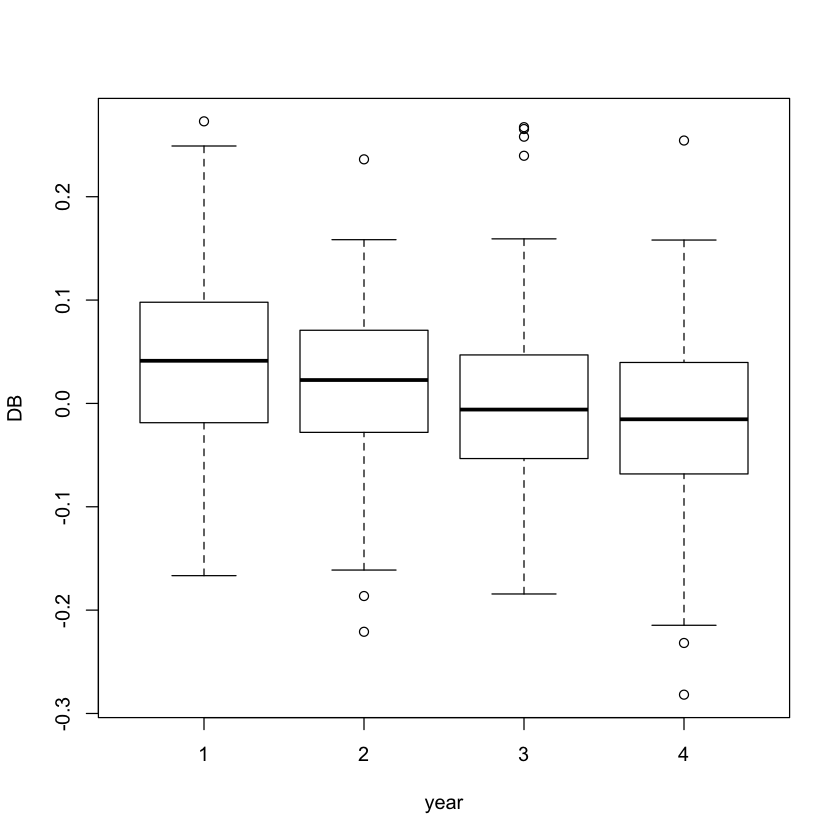

In [7]:
boxplot(DB ~ year, data=map)

It looks like there's a trend downward in DB as year increases. Let's model it.

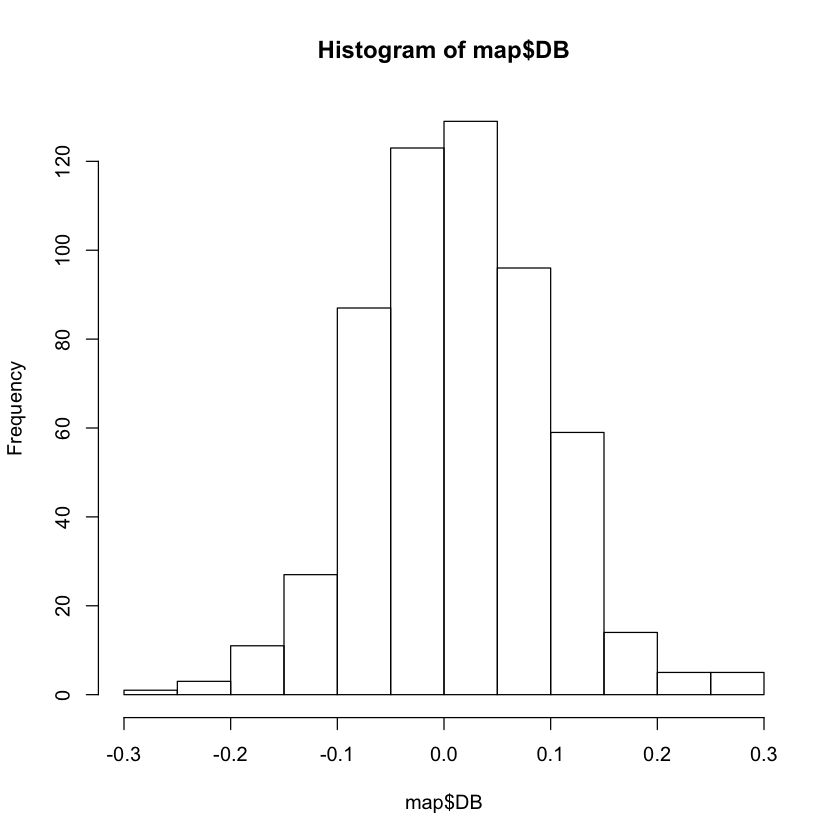

In [6]:
hist(map$DB)

DB seems to be pretty normally distributed about zero. I wonder if this data was already z-scored.

In [11]:
# make factors
map$year = as.numeric(map$year)
map$landmark = as.numeric(map$landmark)

In [12]:
# start with random intercepts per participant
lmm_mod_randsub = lmer(DB ~ year + landmark + (1|pnum), data =map, REML = F)
summary(lmm_mod_randsub)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: DB ~ year + landmark + (1 | pnum)
   Data: map

     AIC      BIC   logLik deviance df.resid 
 -1366.8  -1345.1    688.4  -1376.8      555 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8534 -0.5997 -0.0013  0.5524  3.9014 

Random effects:
 Groups   Name        Variance Std.Dev.
 pnum     (Intercept) 0.002538 0.05038 
 Residual             0.003998 0.06323 
Number of obs: 560, groups:  pnum, 70

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)   0.053751   0.017145  85.087728   3.135  0.00236 **
year         -0.018653   0.006113  69.999999  -3.051  0.00322 **
landmark      0.001098   0.001166 490.000000   0.942  0.34686   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr) year  
year     -0.871       
landmark -0.306  0.000

In [13]:
# add in random intercepts for landmarks
lmm_mod_randsub_randmark = lmer(DB ~ year + landmark + (1|pnum) + (1|landmark), data =map, REML = F)
summary(lmm_mod_randsub_randmark)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: DB ~ year + landmark + (1 | pnum) + (1 | landmark)
   Data: map

     AIC      BIC   logLik deviance df.resid 
 -1496.2  -1470.2    754.1  -1508.2      554 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5411 -0.5848 -0.0359  0.4726  4.9677 

Random effects:
 Groups   Name        Variance Std.Dev.
 pnum     (Intercept) 0.002706 0.05202 
 landmark (Intercept) 0.000978 0.03127 
 Residual             0.002908 0.05393 
Number of obs: 560, groups:  pnum, 70; landmark, 8

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)  0.053751   0.029717 15.787814   1.809  0.08957 . 
year        -0.018653   0.006146 69.453118  -3.035  0.00338 **
landmark     0.001098   0.004927  7.945216   0.223  0.82927   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr) year  
year     -0.5

In [14]:
# add in random intercept per year
lmm_mod_randsub_randmark_randyear = lmer(DB ~ year + landmark + (1|pnum) + (1|landmark) + (1|year), data =map, REML = F)
summary(lmm_mod_randsub_randmark)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: DB ~ year + landmark + (1 | pnum) + (1 | landmark)
   Data: map

     AIC      BIC   logLik deviance df.resid 
 -1496.2  -1470.2    754.1  -1508.2      554 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5411 -0.5848 -0.0359  0.4726  4.9677 

Random effects:
 Groups   Name        Variance Std.Dev.
 pnum     (Intercept) 0.002706 0.05202 
 landmark (Intercept) 0.000978 0.03127 
 Residual             0.002908 0.05393 
Number of obs: 560, groups:  pnum, 70; landmark, 8

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)  0.053751   0.029717 15.787814   1.809  0.08957 . 
year        -0.018653   0.006146 69.453118  -3.035  0.00338 **
landmark     0.001098   0.004927  7.945216   0.223  0.82927   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr) year  
year     -0.5

This was singular, so I'm not going to include it in the model.

In [15]:
# allow for random slopes of participants within landmarks
randslope_pnuminlandmark = lmer(DB ~ year + landmark + (1|pnum) + (1 + pnum|landmark), data =map, REML = F)
summary(randslope_pnuminlandmark)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: DB ~ year + landmark + (1 | pnum) + (1 + pnum | landmark)
   Data: map

     AIC      BIC   logLik deviance df.resid 
 -1493.8  -1459.2    754.9  -1509.8      552 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5740 -0.5972 -0.0300  0.5001  4.9741 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr 
 pnum     (Intercept) 2.951e-03 0.0543260      
 landmark (Intercept) 3.318e-03 0.0575984      
          pnum        7.589e-08 0.0002755 -1.00
 Residual             2.834e-03 0.0532360      
Number of obs: 560, groups:  pnum, 70; landmark, 8

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)  0.0619468  0.0345675  6.4049346   1.792  0.12018   
year        -0.0186993  0.0067928 36.3438478  -2.753  0.00916 **
landmark    -0.0006282  0.0046521  5.3457182  -0.135  0.89752   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 

Also singular, not going to include.

From these models, it appears that the best fitting model is the one that includes random intercepts for participant and landmark. This has a reduced AIC compared to only random intercepts for participant. When adding in random intercepts for year, the solution is singular, so I did not include that in my model. The same was true when I allowed for random slopes for participant within landmark.

This best model finds that year is a significant predictor of DB with p = 0.0034. None of my models failed to find year significant.

#### 2. I’ve enclosed a dataset from Jesse (recent grad student).  Subjects view a display to see if a target is present.  The DV is reaction time.  Set size is the number of items in the display.  There are three different displays and identity codes which display was present.  There are also two orientations: normal (1) and inverted (2).  Presence codes whether the target was present (1 = present).  People usually analyze present trials separately from absent trials.  Is the set size effect different for upright versus inverted items?  Data are in “jesse_search_data”.  You may restrict yourself to the present condition if you like.

In [46]:
#load data
rt = read.csv('./data_files//jesse_search_data.csv')
dim(rt)
head(rt, 20)

[1] 360   6

sub,rt,set_size,identity,presence,orientation
1,0.4851,2,1,1,1
1,0.5002,4,1,1,1
1,0.5041,6,1,1,1
1,0.4842,2,1,2,1
1,0.4956,4,1,2,1
1,0.4945,6,1,2,1
1,0.4909,2,1,1,2
1,0.5114,4,1,1,2
1,0.6035,6,1,1,2
1,0.4881,2,1,2,2


In [47]:
#limit to present condition
rt_present = rt[rt$presence == 1,]
dim(rt_present)

[1] 180   6

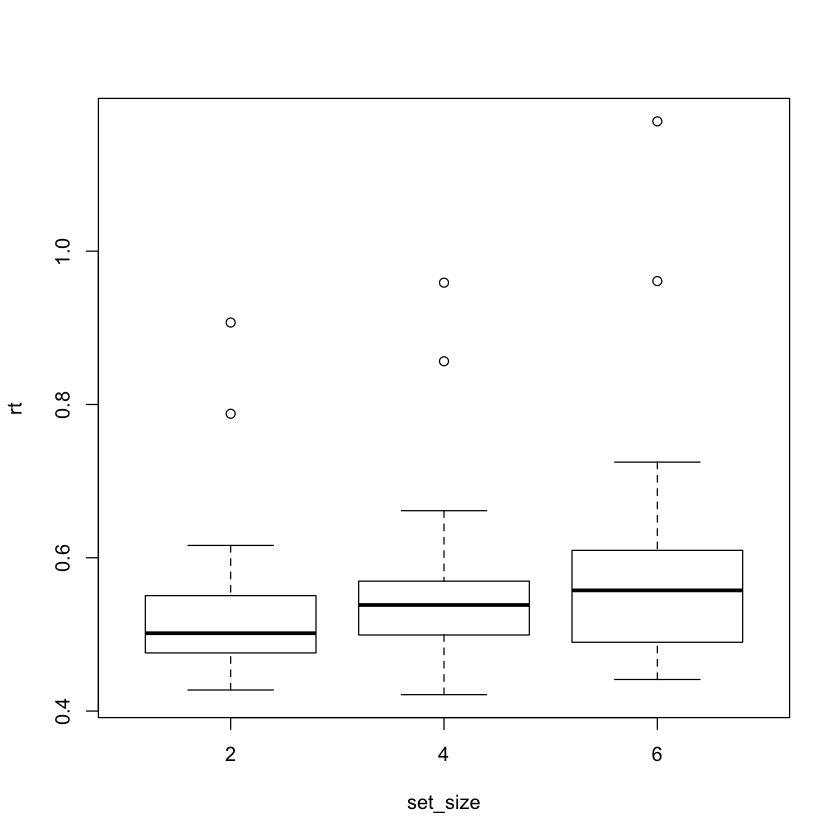

In [22]:
boxplot(rt ~ set_size, data=rt_present)

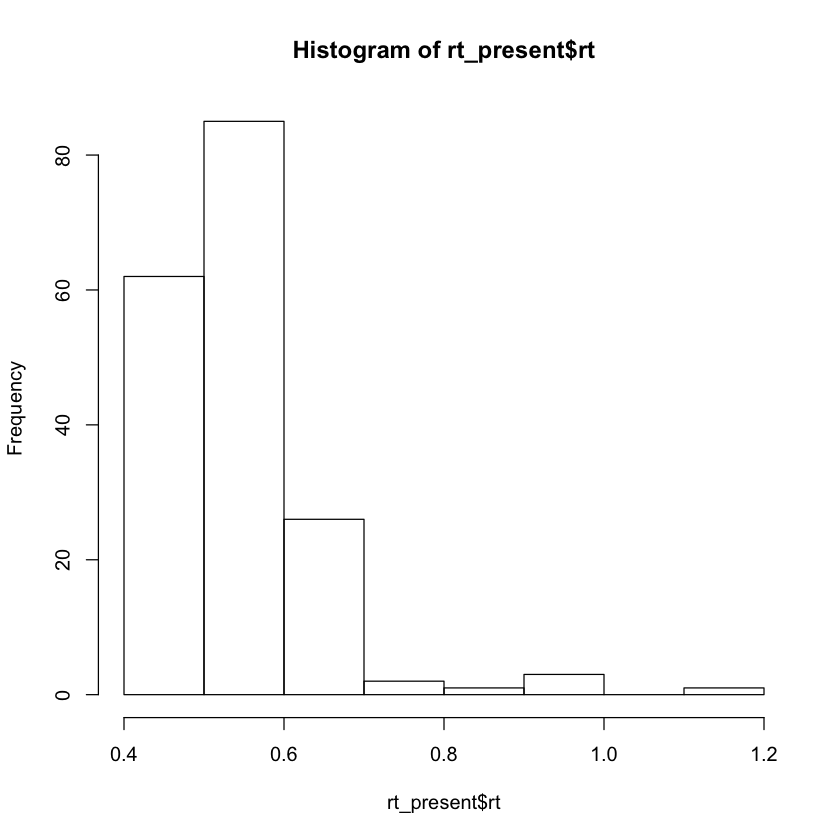

In [23]:
hist(rt_present$rt)

rt is not normally distributed. Might want to consider including an exponential decay function in our lmer, but I think that's Monday's lecture.

In [48]:
#going to transform for exponential decay
rt_present$rt = exp(-rt_present$rt)


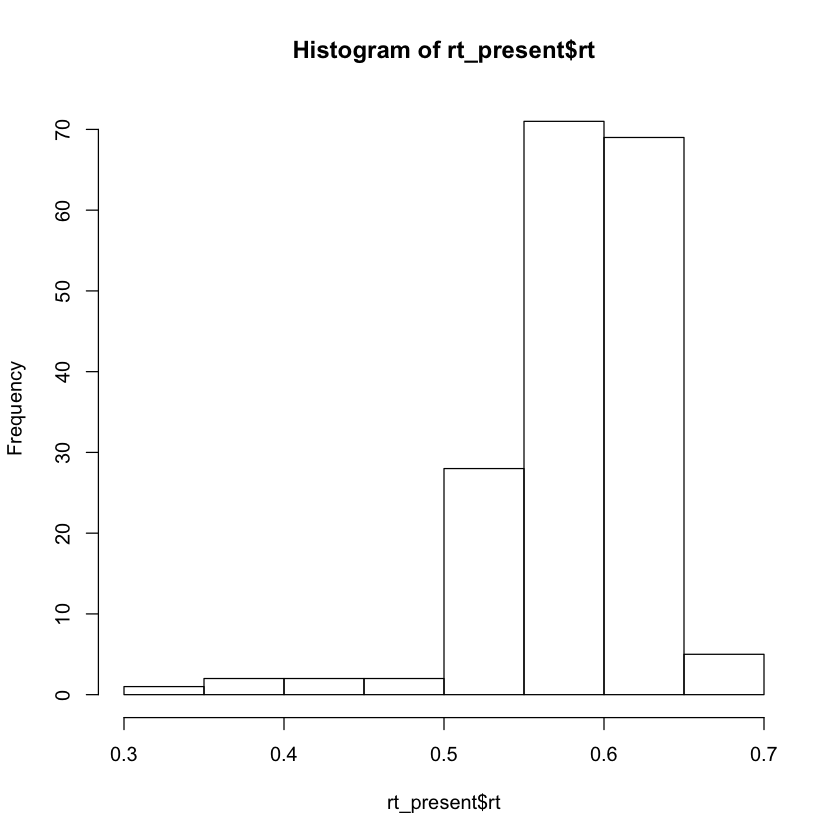

In [39]:
hist(rt_present$rt)

In [40]:
#sub	rt	set_size	identity	presence	orientation
# is the set size effect different for upright versus inverted items
# create model with random intercepts for subject and identity along with the interaction term of set size with
# orientation
lmer1 = lmer(rt ~ set_size*orientation + (1|sub) + (1|identity), data=rt_present, REML = F)
summary(lmer1)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: rt ~ set_size * orientation + (1 | sub) + (1 | identity)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -690.8   -668.4    352.4   -704.8      173 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9093 -0.3783  0.0926  0.5452  2.7948 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub      (Intercept) 1.303e-03 0.036101
 identity (Intercept) 4.366e-05 0.006608
 Residual             9.604e-04 0.030990
Number of obs: 180, groups:  sub, 10; identity, 3

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            0.600058   0.022768  94.946574  26.356   <2e-16 ***
set_size               0.003210   0.004473 167.927596   0.718    0.474    
orientation            0.006089   0.012223 167.927596   0.498    0.619    
set_size:orientation  -0.006591   0.002829 167.927596  -2.330    0.021

In [45]:
# test for interaction, but also allow for random intercepts for subject and identity
# then allow for random slopes for identity within each subject, since all subjects have all identities
lmer1 = lmer(rt ~ set_size*orientation + (1+identity|sub) + (1|identity), data=rt_present, REML = F)
summary(lmer1)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: rt ~ set_size * orientation + (1 + identity | sub) + (1 | identity)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -704.3   -675.6    361.2   -722.3      171 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2659 -0.4973  0.0142  0.5372  2.5728 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 sub      (Intercept) 3.547e-03 0.059560      
          identity    2.135e-04 0.014611 -0.88
 identity (Intercept) 3.974e-05 0.006304      
 Residual             8.162e-04 0.028569      
Number of obs: 180, groups:  sub, 10; identity, 3

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            0.603435   0.020935  87.672941  28.824   <2e-16 ***
set_size               0.003210   0.004124 158.705746   0.779   0.4374    
orientation            0.006089   0.011268 158.705747   0.540  

In [50]:
lmer1 = lmer(rt ~ set_size*orientation + (1|sub) + (1|identity) + (1|orientation), data=rt_present, REML = F)
summary(lmer1)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: rt ~ set_size * orientation + (1 | sub) + (1 | orientation)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -687.8   -665.4    350.9   -701.8      173 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0032 -0.4077  0.0935  0.5316  2.9384 

Random effects:
 Groups      Name        Variance  Std.Dev.
 sub         (Intercept) 0.0012883 0.03589 
 orientation (Intercept) 0.0000000 0.00000 
 Residual                0.0009938 0.03152 
Number of obs: 180, groups:  sub, 10; orientation, 2

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            0.600058   0.022700  99.877265  26.434   <2e-16 ***
set_size               0.003210   0.004550 170.000000   0.706   0.4814    
orientation            0.006089   0.012433 170.000000   0.490   0.6250    
set_size:orientation  -0.006591   0.002878 170.00000